# Backpropagation algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import datetime as dt 
import autograd.numpy as anp
from autograd import grad
import random

c = 299792458  # Speed of light in m/s§

In [2]:
# Use definition as in the Extractor class

def H_th_function(n, w, length):
    '''
    Inputs
    ------
    n: refractive index
    w: frequency of light being propagated
    length: length of the sample we are modelling
    
    outputs
    -------
    returns: output for the transfer function

    Method
    ------
    Equation for transfer function derived from [Input source here]

    '''
    return (4 * n) / ((n + 1) ** 2) * anp.exp(-1j * (n - 1) * w * length/ c)

# Function to round to significant figures
def round_to_sig_figs(value, sig_figs):
    if value == 0:
        return 0
    return round(value, sig_figs - int(f"{value:.1e}".split('e')[1]) - 1)


# Define loss functions
def abs_tf_loss(H_exp, H):
    return np.mean(np.abs(H_exp - H))

def phase_tf_loss(phase_exp, phase):
    return np.mean(np.abs(phase_exp - phase))

def loss(H_exp, H, phase_exp, phase):
    return abs_tf_loss(H_exp, H) + phase_tf_loss(phase_exp, phase)

In [3]:
# TODO: generate random n,k,d for backprop algo, add noise to this.

# frequency range
interp = 2**6
freqs_THz = np.linspace(0.1, 5, interp)   # 0-5 THz 
freqs = freqs_THz * 1e12
freqs_ang = freqs * 2 * np.pi

# Generate random n, k, d
n_lims = [2, 4]
k_lims = [-0.1, 0]
d_lims = [300e-6, 500e-6]

# Define significant figures for each parameter
n_sig_figs = 6
k_sig_figs = 6
d_sig_figs = 6

# Generate data point
n = random.uniform(*n_lims)
k = random.uniform(*k_lims)
d = random.uniform(*d_lims)

# Apply significant figures
n = round_to_sig_figs(n, n_sig_figs)
k = round_to_sig_figs(k, k_sig_figs)
d = round_to_sig_figs(d, d_sig_figs)

tf_values = [H_th_function((n+k*1j), f, d) for f in freqs_ang]

H_values_clean = np.abs(tf_values)
phi_values_clean = np.unwrap(np.angle(tf_values))

# add noise or actual signals
H_values = H_values_clean + np.random.normal(0, 0.01, size=len(H_values_clean))
phi_values = phi_values_clean + np.random.normal(0, 1, size=len(phi_values_clean))

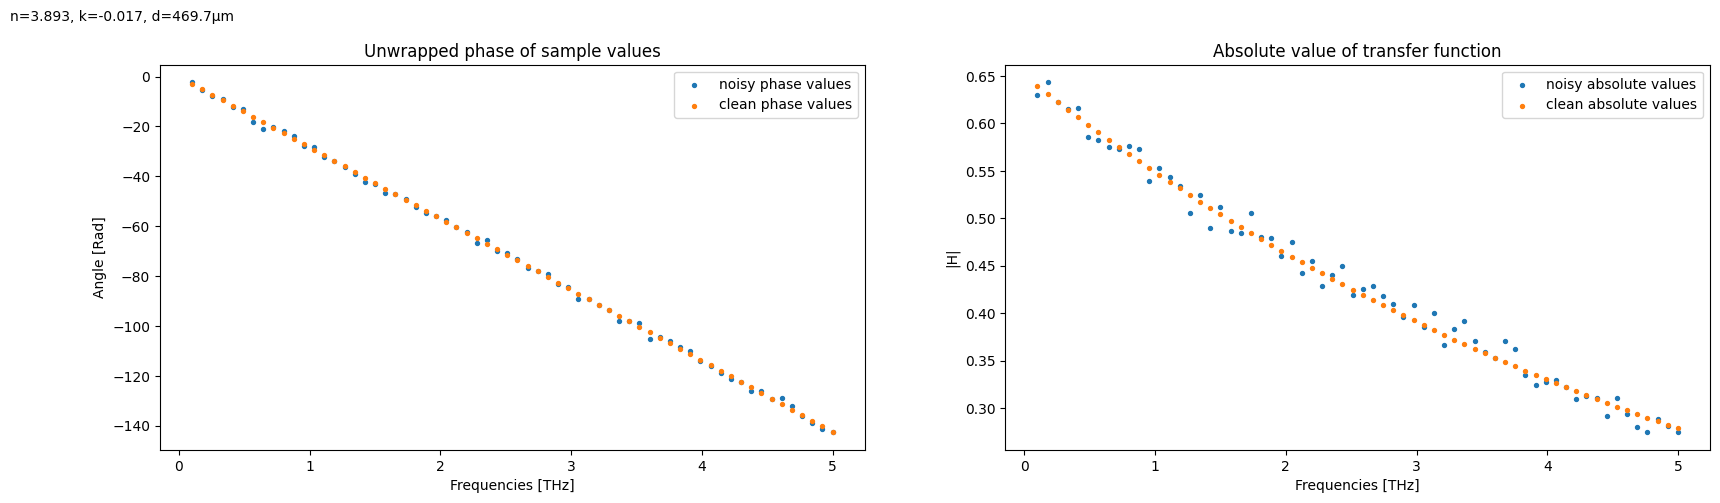

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(freqs_THz, phi_values, s=8, label='noisy phase values')
axs[0].scatter(freqs_THz, phi_values_clean, s=8, label='clean phase values')
axs[0].set_title('Unwrapped phase of sample values')
axs[0].set_xlabel('Frequencies [THz]')
axs[0].set_ylabel('Angle [Rad]')

axs[1].scatter(freqs_THz, H_values, s=8, label='noisy absolute values')
axs[1].scatter(freqs_THz, H_values_clean, s=8, label='clean absolute values')
axs[1].set_title('Absolute value of transfer function')
axs[1].set_xlabel('Frequencies [THz]')
axs[1].set_ylabel('|H|')

# Annotate with n, k, d values
axs[1].set_ylabel('|H|')

# Add a label at the top-left of the entire figure (outside the subplots)
fig.text(0.05, 0.99, f'n={n:.3f}, k={k:.3f}, d={1e6*d:.1f}µm', 
         verticalalignment='top', horizontalalignment='left', 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

axs[0].legend()
axs[1].legend()
plt.show()

In [5]:
# TODO: Copy grid-search approach to here

In [6]:
# TODO: Implement pytorch back-prop here